## 회귀 모델 연습문제

### 데이터 로드

In [1]:
import numpy as np
import pandas as pd

In [2]:
boston_df = pd.read_csv('../data/boston_dataset.csv', index_col=0)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
X_feature = boston_df.drop('PRICE', axis=1)
y_target = boston_df['PRICE']

In [4]:
X_feature.info() # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


In [5]:
X_feature.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [6]:
y_target.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.15, random_state=1)

### 데이터 전처리

### 모델 생성

In [8]:
from keras.models import Sequential 
from keras.layers import Dense

In [9]:
model_boston = Sequential()

model_boston.add(Dense(units=10, input_dim=13, activation='sigmoid'))
model_boston.add(Dense(units=10, activation='linear'))
model_boston.add(Dense(units=1, activation='relu'))

model_boston.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error')

### 학습

In [10]:
history = model_boston.fit(x=X_train, y=y_train, epochs=300, batch_size=4,
                           validation_data=(X_test, y_test))

Epoch 1/300
108/108 [==============================] - 0s 1ms/step - loss: 533.0770 - mean_squared_error: 533.0770 - val_loss: 469.1149 - val_mean_squared_error: 469.1149
Epoch 2/300
108/108 [==============================] - 0s 605us/step - loss: 395.9005 - mean_squared_error: 395.9005 - val_loss: 311.6640 - val_mean_squared_error: 311.6640
Epoch 3/300
108/108 [==============================] - 0s 592us/step - loss: 229.7253 - mean_squared_error: 229.7253 - val_loss: 159.0944 - val_mean_squared_error: 159.0944
Epoch 4/300
108/108 [==============================] - 0s 542us/step - loss: 106.1507 - mean_squared_error: 106.1507 - val_loss: 84.1814 - val_mean_squared_error: 84.1814
Epoch 5/300
108/108 [==============================] - 0s 532us/step - loss: 73.6098 - mean_squared_error: 73.6098 - val_loss: 72.9035 - val_mean_squared_error: 72.9035
Epoch 6/300
108/108 [==============================] - 0s 524us/step - loss: 68.9566 - mean_squared_error: 68.9566 - val_loss: 70.8558 - val_me

108/108 [==============================] - 0s 530us/step - loss: 54.4998 - mean_squared_error: 54.4998 - val_loss: 58.4787 - val_mean_squared_error: 58.4787
Epoch 50/300
108/108 [==============================] - 0s 518us/step - loss: 54.5827 - mean_squared_error: 54.5827 - val_loss: 58.6374 - val_mean_squared_error: 58.6374
Epoch 51/300
108/108 [==============================] - 0s 526us/step - loss: 53.9983 - mean_squared_error: 53.9983 - val_loss: 59.3471 - val_mean_squared_error: 59.3471
Epoch 52/300
108/108 [==============================] - 0s 528us/step - loss: 54.3809 - mean_squared_error: 54.3809 - val_loss: 57.0729 - val_mean_squared_error: 57.0729
Epoch 53/300
108/108 [==============================] - 0s 512us/step - loss: 52.6550 - mean_squared_error: 52.6550 - val_loss: 57.8854 - val_mean_squared_error: 57.8854
Epoch 54/300
108/108 [==============================] - 0s 485us/step - loss: 53.7110 - mean_squared_error: 53.7110 - val_loss: 60.2697 - val_mean_squared_error: 6

108/108 [==============================] - 0s 544us/step - loss: 25.3216 - mean_squared_error: 25.3216 - val_loss: 34.1200 - val_mean_squared_error: 34.1200
Epoch 98/300
108/108 [==============================] - 0s 539us/step - loss: 23.8067 - mean_squared_error: 23.8067 - val_loss: 26.7554 - val_mean_squared_error: 26.7554
Epoch 99/300
108/108 [==============================] - 0s 559us/step - loss: 23.8688 - mean_squared_error: 23.8688 - val_loss: 33.3895 - val_mean_squared_error: 33.3895
Epoch 100/300
108/108 [==============================] - 0s 532us/step - loss: 27.6989 - mean_squared_error: 27.6989 - val_loss: 32.0875 - val_mean_squared_error: 32.0875
Epoch 101/300
108/108 [==============================] - 0s 520us/step - loss: 23.9056 - mean_squared_error: 23.9056 - val_loss: 28.1646 - val_mean_squared_error: 28.1646
Epoch 102/300
108/108 [==============================] - 0s 663us/step - loss: 24.3003 - mean_squared_error: 24.3003 - val_loss: 29.6278 - val_mean_squared_error

108/108 [==============================] - 0s 538us/step - loss: 21.6254 - mean_squared_error: 21.6254 - val_loss: 31.1180 - val_mean_squared_error: 31.1180
Epoch 146/300
108/108 [==============================] - 0s 491us/step - loss: 21.1972 - mean_squared_error: 21.1972 - val_loss: 29.4348 - val_mean_squared_error: 29.4348
Epoch 147/300
108/108 [==============================] - 0s 488us/step - loss: 22.2101 - mean_squared_error: 22.2101 - val_loss: 26.7318 - val_mean_squared_error: 26.7318
Epoch 148/300
108/108 [==============================] - 0s 633us/step - loss: 22.5772 - mean_squared_error: 22.5772 - val_loss: 26.5040 - val_mean_squared_error: 26.5040
Epoch 149/300
108/108 [==============================] - 0s 557us/step - loss: 21.6875 - mean_squared_error: 21.6875 - val_loss: 29.7222 - val_mean_squared_error: 29.7222
Epoch 150/300
108/108 [==============================] - 0s 580us/step - loss: 22.6570 - mean_squared_error: 22.6570 - val_loss: 26.1386 - val_mean_squared_err

Epoch 193/300
108/108 [==============================] - 0s 516us/step - loss: 20.0728 - mean_squared_error: 20.0728 - val_loss: 27.6964 - val_mean_squared_error: 27.6964
Epoch 194/300
108/108 [==============================] - 0s 546us/step - loss: 21.4413 - mean_squared_error: 21.4413 - val_loss: 30.2384 - val_mean_squared_error: 30.2384
Epoch 195/300
108/108 [==============================] - 0s 531us/step - loss: 23.2717 - mean_squared_error: 23.2717 - val_loss: 45.1738 - val_mean_squared_error: 45.1738
Epoch 196/300
108/108 [==============================] - 0s 497us/step - loss: 21.5882 - mean_squared_error: 21.5882 - val_loss: 24.8986 - val_mean_squared_error: 24.8986
Epoch 197/300
108/108 [==============================] - 0s 514us/step - loss: 21.2754 - mean_squared_error: 21.2754 - val_loss: 40.9599 - val_mean_squared_error: 40.9599
Epoch 198/300
108/108 [==============================] - 0s 512us/step - loss: 21.1902 - mean_squared_error: 21.1902 - val_loss: 22.5675 - val_me

Epoch 241/300
108/108 [==============================] - 0s 474us/step - loss: 21.1780 - mean_squared_error: 21.1780 - val_loss: 24.2566 - val_mean_squared_error: 24.2566
Epoch 242/300
108/108 [==============================] - 0s 484us/step - loss: 19.6290 - mean_squared_error: 19.6290 - val_loss: 24.6611 - val_mean_squared_error: 24.6611
Epoch 243/300
108/108 [==============================] - 0s 503us/step - loss: 20.0678 - mean_squared_error: 20.0678 - val_loss: 23.9218 - val_mean_squared_error: 23.9218
Epoch 244/300
108/108 [==============================] - 0s 465us/step - loss: 20.3215 - mean_squared_error: 20.3215 - val_loss: 23.6092 - val_mean_squared_error: 23.6092
Epoch 245/300
108/108 [==============================] - 0s 490us/step - loss: 19.9502 - mean_squared_error: 19.9502 - val_loss: 24.6330 - val_mean_squared_error: 24.6330
Epoch 246/300
108/108 [==============================] - 0s 495us/step - loss: 19.0182 - mean_squared_error: 19.0182 - val_loss: 23.5192 - val_me

Epoch 289/300
108/108 [==============================] - 0s 488us/step - loss: 19.3689 - mean_squared_error: 19.3689 - val_loss: 24.4543 - val_mean_squared_error: 24.4543
Epoch 290/300
108/108 [==============================] - 0s 478us/step - loss: 23.5960 - mean_squared_error: 23.5960 - val_loss: 23.1562 - val_mean_squared_error: 23.1562
Epoch 291/300
108/108 [==============================] - 0s 472us/step - loss: 19.9816 - mean_squared_error: 19.9816 - val_loss: 27.8589 - val_mean_squared_error: 27.8589
Epoch 292/300
108/108 [==============================] - 0s 482us/step - loss: 21.9546 - mean_squared_error: 21.9546 - val_loss: 23.9125 - val_mean_squared_error: 23.9125
Epoch 293/300
108/108 [==============================] - 0s 476us/step - loss: 20.8345 - mean_squared_error: 20.8345 - val_loss: 22.0568 - val_mean_squared_error: 22.0568
Epoch 294/300
108/108 [==============================] - 0s 503us/step - loss: 19.2950 - mean_squared_error: 19.2950 - val_loss: 22.8664 - val_me

### 시각화

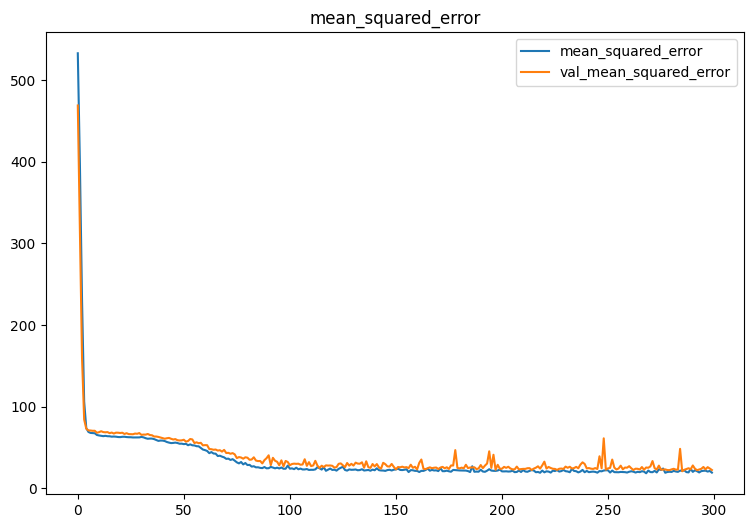

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))

plt.plot(history.history['mean_squared_error'], label='mean_squared_error')
plt.plot(history.history['val_mean_squared_error'], label='val_mean_squared_error')
plt.title('mean_squared_error')
plt.legend()

plt.show()

### 실제 예측

In [12]:
# 3번째 테스트데이터및 가격
print(X_test.iloc[2])
print('가격 : ', y_test.iloc[2])

CRIM         0.22927
ZN           0.00000
INDUS        6.91000
CHAS         0.00000
NOX          0.44800
RM           6.03000
AGE         85.50000
DIS          5.68940
RAD          3.00000
TAX        233.00000
PTRATIO     17.90000
B          392.74000
LSTAT       18.80000
Name: 47, dtype: float64
가격 :  16.6


In [13]:
# 3번째 테스트데이터의 예측 가격
model_boston.predict(X_test.iloc[2:3])

1/1 [==============================] - 0s 36ms/step


array([[22.331627]], dtype=float32)

In [14]:
# 10번째 테스트데이터및 가격
print(X_test.iloc[9])
print('가격 : ', y_test.iloc[9])

CRIM         0.04684
ZN           0.00000
INDUS        3.41000
CHAS         0.00000
NOX          0.48900
RM           6.41700
AGE         66.10000
DIS          3.09230
RAD          2.00000
TAX        270.00000
PTRATIO     17.80000
B          392.18000
LSTAT        8.81000
Name: 90, dtype: float64
가격 :  22.6


In [15]:
# 10번째 테스트데이터의 예측 가격
model_boston.predict(X_test.iloc[9:10])

1/1 [==============================] - 0s 8ms/step


array([[20.624174]], dtype=float32)